In [1]:
!pip install opencv-python



  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Define paths
# FIXED: use raw strings or forward slashes
train_dir = r"D:\visual detection\casting_data\casting_data\train"
test_dir = r"D:\visual detection\casting_data\casting_data\test"


# Image parameters
img_size = 128  # resize images to 128x128


In [16]:
def load_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        path = os.path.join(folder_path, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(label)
    return images, labels

# Load OK and Defective images from training set
ok_images, ok_labels = load_images(os.path.join(train_dir, "ok_front"), 0)
def_images, def_labels = load_images(os.path.join(train_dir, "def_front"), 1)

# Combine
X_train = np.array(ok_images + def_images)
y_train = np.array(ok_labels + def_labels)


In [18]:
pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 3.4/376.0 MB 22.3 MB/s eta 0:00:17
   - -------------------------------------- 10.7/376.0 MB 29.2 MB/s eta 0:00:13
   -- ------------------------------------- 20.7/376.0 MB 32.7 MB/s eta 0:00:11
   -- ------------------------------------- 27.5/376.0 MB 32.3 MB/s eta 0:00:11
   --- ------------------------------------ 36.4/376.0 MB 34.1 MB/s eta 0:00:10
   ---- ----------------------------------- 45.4/376.0 MB 35.2 MB/s eta 0:00:10
   ----- ---------------------------------- 54.3/376.0 MB 36.0 MB/s eta 0:00:09
   ------ --------------------------------- 64.2/376.0 MB 37.2 MB/s eta 0:00:09
   ------- -------------------------------- 73.1/376.0 MB 37.6 MB/s eta 0:00:09
   -------- ------------------------------- 82.8/376.0 MB 38.3 MB/s eta 0:00:08
   --------- ------------------------------ 93.3/376.0 MB 39.2 MB/s eta 0:00:08
   ---------- ---------------------------- 104.1/3

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Prepare Data for Training

In [23]:
# Normalize pixel values to 0-1
X_train = X_train / 255.0

# Reshape: CNN expects shape (samples, height, width, channels)
X_train = X_train.reshape(-1, img_size, img_size, 1)

# Convert labels to categorical (0 → [1, 0], 1 → [0, 1])
y_train_cat = to_categorical(y_train, num_classes=2)

# Split into train and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train_cat, test_size=0.2, random_state=42)

print("X_tr shape:", X_tr.shape)
print("y_tr shape:", y_tr.shape)


X_tr shape: (5306, 128, 128, 1)
y_tr shape: (5306, 2)


# Build CNN Model

In [26]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # 2 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,002 (28.20 MB)

 Trainable params: 7,392,002 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [29]:
history = model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 48s 270ms/step - accuracy: 0.5943 - loss: 0.8592 - val_accuracy: 0.8214 - val_loss: 0.4172
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 44s 267ms/step - accuracy: 0.8247 - loss: 0.3741 - val_accuracy: 0.9073 - val_loss: 0.2150
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 44s 264ms/step - accuracy: 0.9192 - loss: 0.2040 - val_accuracy: 0.9450 - val_loss: 0.1375
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 44s 264ms/step - accuracy: 0.9505 - loss: 0.1408 - val_accuracy: 0.9593 - val_loss: 0.1135
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 45s 270ms/step - accuracy: 0.9594 - loss: 0.1112 - val_accuracy: 0.9661 - val_loss: 0.0825
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 44s 265ms/step - accuracy: 0.9752 - loss: 0.0722 - val_accuracy: 0.9812 - val_loss: 0.0509
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 45s 273ms/step - accuracy: 0.9734 - loss: 0.0736 - val_accuracy: 0.9812 - val_loss: 0.0559
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 45s 272ms/step - accuracy: 0.9860 - loss: 0

# Plot Accuracy and Loss

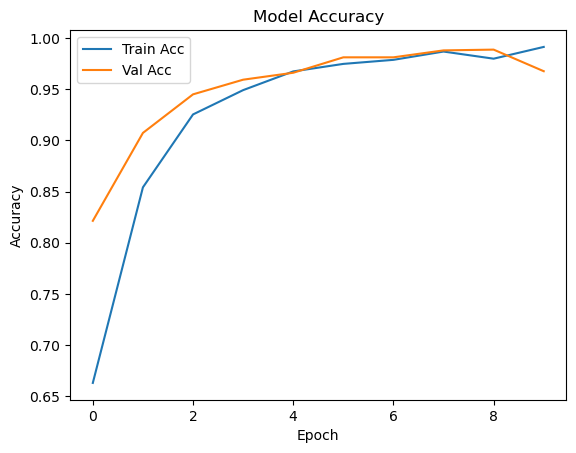

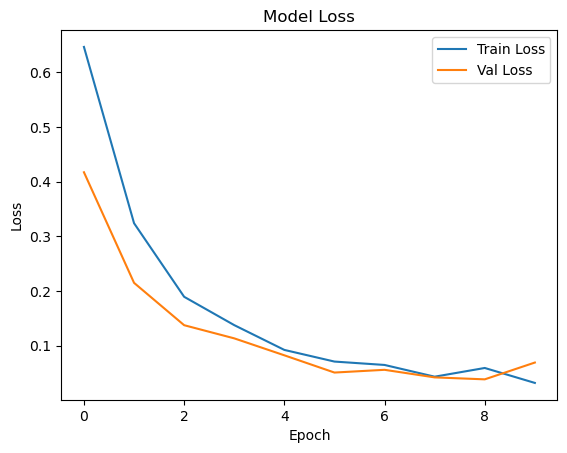

In [32]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


#  Load test data

In [35]:
# Define test path (adjust if needed)
test_dir = r"D:\visual detection\casting_data\casting_data\test"

# Load test images
test_ok, test_ok_labels = load_images(os.path.join(test_dir, "ok_front"), 0)
test_def, test_def_labels = load_images(os.path.join(test_dir, "def_front"), 1)

# Combine test data
X_test = np.array(test_ok + test_def)
y_test = np.array(test_ok_labels + test_def_labels)

# Preprocess
X_test = X_test / 255.0
X_test = X_test.reshape(-1, img_size, img_size, 1)

from tensorflow.keras.utils import to_categorical
y_test_cat = to_categorical(y_test, num_classes=2)


# Evaluate the model

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9900 - loss: 0.0290
Test Accuracy: 98.32%


# Confusion Matrix & Classification Report

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


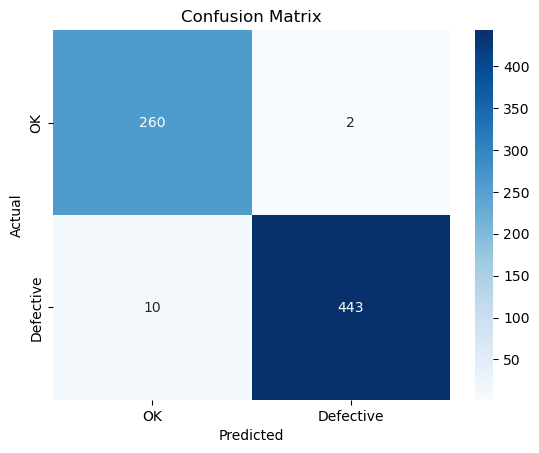

              precision    recall  f1-score   support

          OK       0.96      0.99      0.98       262
   Defective       1.00      0.98      0.99       453

    accuracy                           0.98       715
   macro avg       0.98      0.99      0.98       715
weighted avg       0.98      0.98      0.98       715



In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['OK', 'Defective'], yticklabels=['OK', 'Defective'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=['OK', 'Defective']))


# Save the trained model

In [44]:
model.save("casting_defect_model.h5")
print("✅ Model saved as casting_defect_model.h5")


✅ Model saved as casting_defect_model.h5
